# Improved GANs

GANs can be notoriously difficult to train, and are prone to mode collapse. Mode collapse is a situation where the generator is producing outputs that look the same even though the loss functions are already optimized.

The Wasserstein GAN (WGAN) addressed these problems by arguing that stable training and mode collapse can be avoided by simply replacing the GAN loss function based on Wasserstein 1, also known as the Earth Mover's Distance (EMD).

the issue of stability is not the only problem with GANs. There is also
the increasing need to improve the perceptive quality of the generated images.

The Least Squares GAN (LSGAN) proposed addressing both these problems
simultaneously. 

The basic premise is that sigmoid cross-entropy loss leads to a vanishing gradient during training. This results in poor image quality. Least squares loss does not induce vanishing gradients. The resulting generated images are of higher perceptive quality when compared to vanilla GAN-generated images.

Auxiliary Classifier GAN (ACGAN) proposed a modified conditional algorithm that results in better perceptive quality and diversity of the outputs.

# Wasserstein GAN

GANs are notoriously hard to train. The opposing objectives of the two networks, the discriminator and the generator, can easily cause training instability.

The discriminator attempts to correctly classify the fake data from the real data. Meanwhile, the generator tries its best to trick the discriminator.

If the discriminator learns faster than the generator, the generator parameters will fail to optimize. 

On the other hand, if the discriminator learns more slowly, then the gradients may vanish before reaching the generator. 

In the worst case, if the discriminator is unable to converge, the generator is not going to be able to get any useful feedback.

WGAN argued that a GAN's inherent instability is due to its loss function, which is based on the Jensen-Shannon (JS) distance. In a GAN, the objective of the generator is to learn how to transform from one source distribution (for example, noise) to an estimated target distribution.

Using the original formulation of a GAN, the loss function is actually minimizing the distance between the target distribution and its estimate. The problem is, for some pairs of distributions, there is no smooth path to minimize this JS distance. Hence, the training will fail to converge.

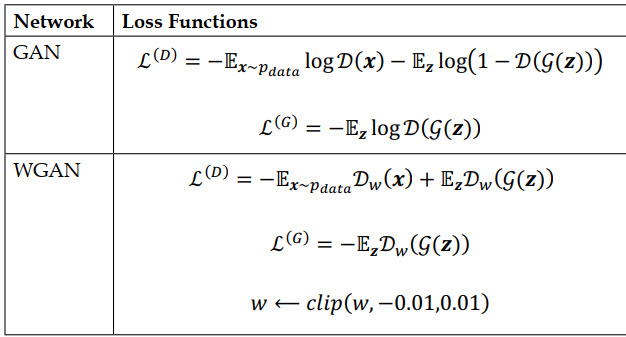

Algorithm WGAN. The values of the parameters are 𝛼 = 0.00005, 𝑐 = 0.01,
𝑚 = 64, and 𝑛critic = 5.

Require: 𝛼, the learning rate. c, the clipping parameter. m, the batch size. 𝑛critic, the number of the critic (discriminator) iterations per generator iteration.

Require: 𝑤0, initial critic (discriminator) parameters. 𝜃0, initial generator parameters:

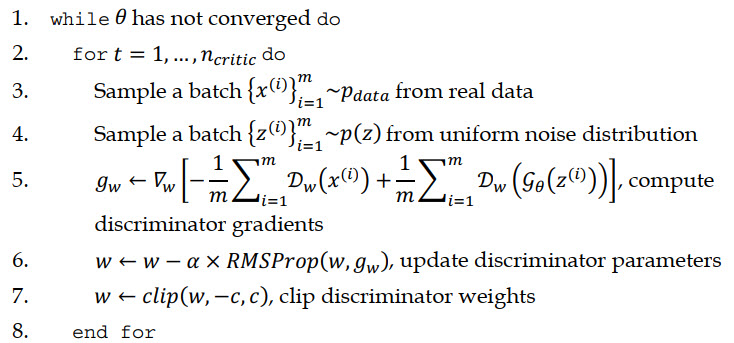

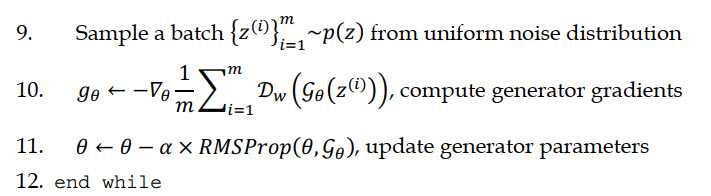

# Illustrates WGAN model

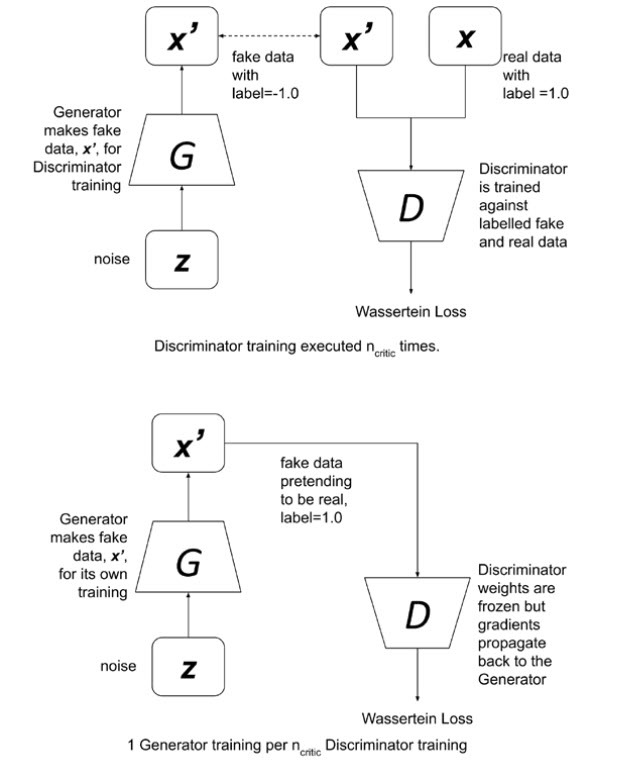

Similar to GANs, WGAN alternately trains the discriminator and generator
(through adversarial). However, in WGAN, the discriminator (also called the critic) trains n critic iterations (lines 2 to 8) before training the generator for one iteration (lines 9 to 11). This is in contrast to GANs with an equal number of training iterations for both the discriminator and generator. In other words, in GANs, ncritic = 1.

Training the discriminator means learning the parameters (weights and biases)
of the discriminator. This requires sampling a batch from the real data (line 3) and a batch from the fake data (line 4) and computing the gradient of discriminator parameters (line 5) after feeding the sampled data to the discriminator network. The discriminator parameters are optimized using RMSProp (line 6).

The Lipschitz constraint in the EM distance optimization is imposed by
clipping the discriminator parameters (line 7).

After ncritic iterations of discriminator training, the discriminator
parameters are frozen. The generator training starts by sampling a batch of
fake data (line 9). The sampled data is labeled as real (1.0), endeavoring to fool the discriminator network. The generator gradients are computed in line 10 and optimized using the RMSProp in line 11

After training the generator, the discriminator parameters are unfrozen, and another n critic discriminator training iteration starts. We should note that there is no need to freeze the generator parameters during discriminator training as the generator is only involved in the fabrication of data. Similar to GANs, the discriminator can be trained as a separate network. However, training the generator always requires the participation of the discriminator through the adversarial network since the loss is computed from the output of the generator network.

Unlike GANs, in a WGAN, real data is labeled 1.0, while fake data is labeled -1.0 as a workaround in computing the gradient in line 5. Lines 5-6 and 10-11 perform gradient updates

Where ylabel = 1.0 for the real data and ylabel = -1.0 for the fake data. For the discriminator, WGAN increases 𝑦𝑝red = 𝒟𝑤(𝒙) to minimize the loss function when training using the real data.

When training using fake data, WGAN decreases 𝑦𝑝red = 𝒟𝑤(𝒢(𝒛)) to minimize the loss function. For the generator, WGAN increases 𝑦𝑝red = 𝒟𝑤(𝒢(𝒛))) as to minimize the loss function when the fake data is labeled as real during training.

Note that ylabel has no direct contribution in the loss function other than its sign.

The most important part of this section is the new loss function for the stable training of GANs. It is based on the EMD or Wasserstein 1

## training

Instead of training the weights in a single combined batch of both real and fake data, we'll train with one batch of real data first and then a batch of fake data. This tweak will prevent the gradient from vanishing because of the opposite sign in the label of real and fake data and the small magnitude of weights due to clipping.

The WGAN is stable even under network configuration changes. For example,
DCGAN is known to be unstable when batch normalization is inserted before the
ReLU in the discriminator network. The same configuration is stable in WGAN

The original GAN is difficult to train. The problem arises when the GAN optimizes its loss function; it's actually optimizing the JS divergence,
DJS. It is difficult to optimize DJS when there is little to no overlap between two distribution functions.

WGAN proposed to address the problem by using the EMD or Wasserstein 1 loss
function, which has a smooth differentiable function even when there is little or no overlap between the two distributions. However, WGAN is not concerned with the generated image quality. Apart from stability issues, there are still areas of improvement in terms of perceptive quality in the generated images of the original GAN

# Least-squares GAN (LSGAN)

LSGAN proposes the least squares loss. where use of a sigmoid cross-entropy loss in GANs results in poorly generated data quality.

Ideally, the fake sample distribution should be as close as possible to the true samples' distribution. However, for GANs, once the fake samples are already on the correct side of the decision boundary, the gradients vanish.

This prevents the generator from having enough motivation to improve the
quality of the generated fake data. Fake samples far from the decision boundary will no longer attempt to move closer to the true samples' distribution. 

Using the least squares loss function, the gradients do not vanish as long as the fake sample distribution is far from the real samples' distribution. The generator will strive to improve its estimate of real density distribution even if the fake samples are already on the correct side of the decision boundary.

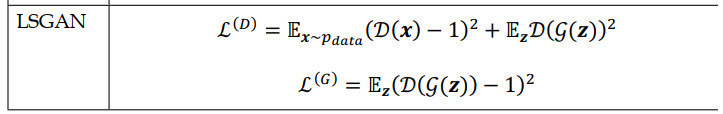

Minimizing the discriminator loss function implies that the MSE between real data classification and the true label 1.0 should be close to zero. In addition, the MSE between the fake data classification and the true label 0.0 should be close to zero.

the LSGAN discriminator is trained to classify real from fake data samples. Minimizing Equation 5.2.2 means fooling the discriminator to think that the generated fake sample data is real with the help of label 1.0.

With the use of MSE or L2, we addressed the twin problems of training the stability and perceptive quality of the GANs. 

# Auxiliary Classifier GAN (ACGAN)

ACGAN is similar in principle to the Conditional GAN (CGAN) 

For both CGAN and ACGAN, the generator inputs are noise and its label. The output is a fake image belonging to the input class label. For CGAN, the inputs to the discriminator are an image (fake or real) and its label. The output is the probability that the image is real. For ACGAN, the input to the discriminator is an image, whilst the output is the probability that the image is real and its class is a label.

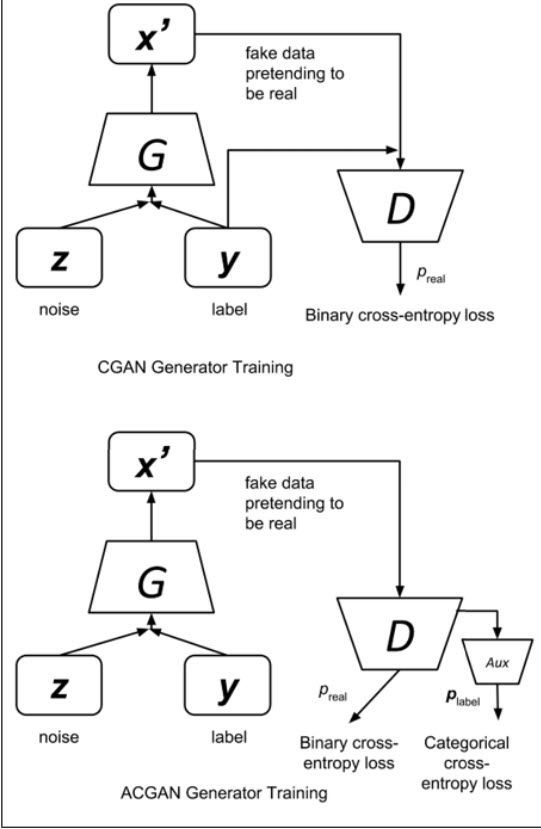

in CGAN we feed the network with side information (label). In ACGAN, we try to reconstruct the side information using an auxiliary class decoder network.

ACGAN theory argues that forcing the network to do additional tasks is known
to improve the performance of the original task. In this case, the additional task is image classification. The original task is the generation of fake images.

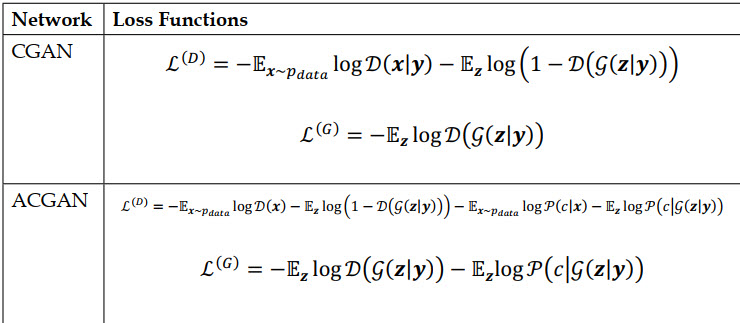

ACGAN loss functions are the same as CGAN except for the additional classifier
loss functions. the discriminator has the additional task of correctly classifying real and fake images

The generator means that apart from trying to fool the discriminator with fake images (−𝔼𝒛 log 𝒟(𝒢(𝒛|𝒚))), it is asking the discriminator to correctly classify those fake images (−𝔼𝒛 log 𝒫(𝑐|𝒢(𝒛|𝒚))).

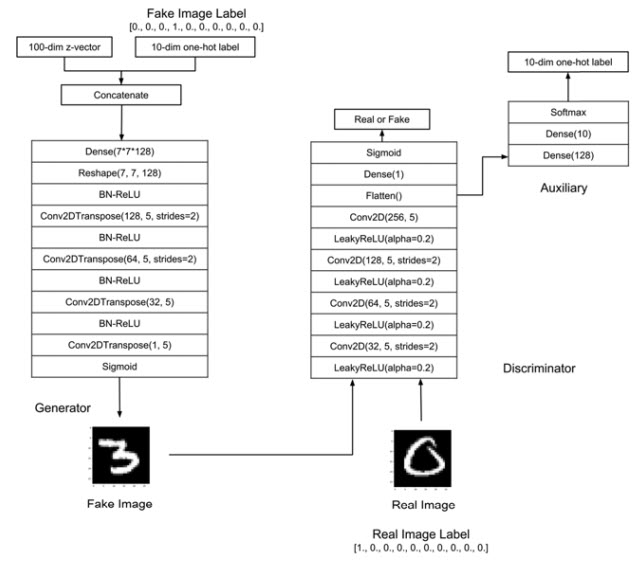

the discriminator and adversarial models are modified to accommodate the changes in the discriminator network. now have two loss functions. 

The first is the original binary cross-entropy to train the discriminator in estimating the probability of the input image being real.

The second is the image classifier predicting the class label. The output is a one-hot vector of 10 dimensions.

It transpires that with the additional task, the performance improvement in ACGAN is significant compared to all GANs that we have discussed previously. ACGAN training is stable.

Unlike in CGAN, the appearance of the sample outputs does not vary widely during training

Similar to WGAN and LSGAN, ACGAN provided an improvement in an existing
GAN, CGAN, by fine-tuning its loss function